# Epidemics Colombia Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dengue = pd.read_excel('Dengue_processed.xlsx')
df_dengue.drop(columns = ['Unnamed: 0'], inplace= True)
df_zika = pd.read_excel('Zika_processed.xlsx')
df_zika.drop(columns = ['Unnamed: 0'], inplace= True)
df_chic = pd.read_excel('Chicunguya_processed.xlsx')
df_chic.drop(columns = ['Unnamed: 0'], inplace= True)
df_var = pd.read_excel('Varicela_processed.xlsx')

In [3]:
df_dengue.head()

,SEMANA,ANO,Casos,DATE
0,1,2007,315,2007-01-01
1,2,2007,236,2007-01-08
2,3,2007,252,2007-01-15
3,4,2007,305,2007-01-22
4,5,2007,360,2007-01-29


# Plots

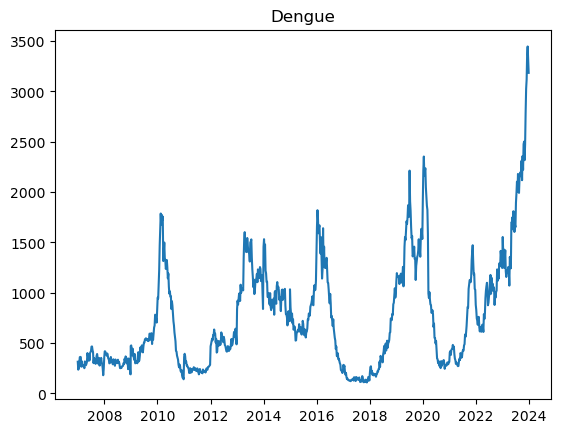

In [4]:
plt.plot(df_dengue['DATE'], df_dengue['Casos'])
plt.title('Dengue')
plt.show()

First split would be 2008-2012
Second split 2012-2018
Third split 2018-2020
Fourth split 2018-

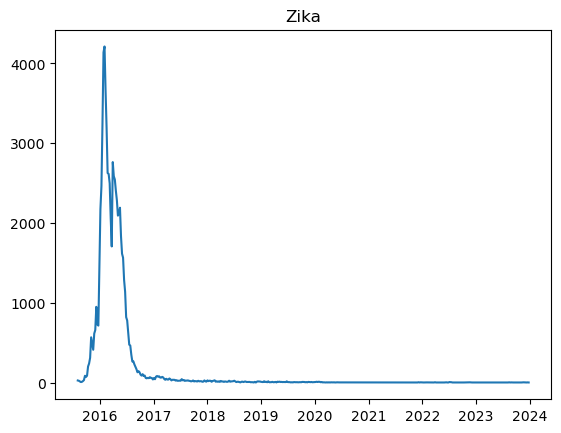

In [5]:
plt.plot(df_zika['DATE'], df_zika['Casos'])
plt.title('Zika')
plt.show()

No splits

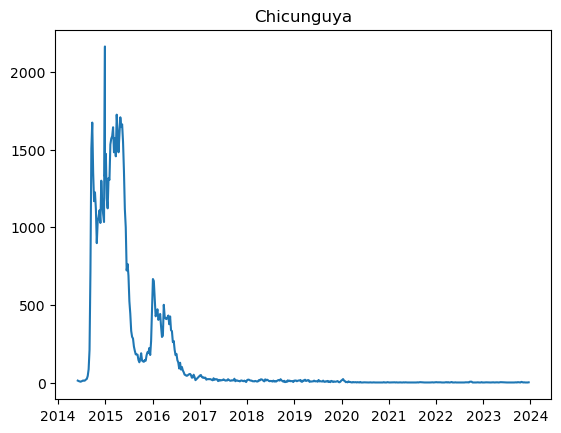

In [6]:
plt.plot(df_chic['DATE'], df_chic['Casos'])
plt.title('Chicunguya')
plt.show()

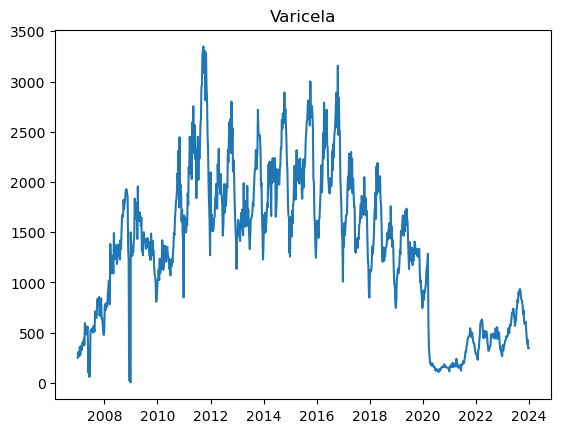

In [7]:
plt.plot(df_var['DATE'], df_var['Casos'])
plt.title('Varicela')
plt.show()

No splits

# Comments

All epidemics have a major outbreak then a smaller one, so the functions should be able to model that, like two consecutive peaks and the second is smaller

# Wrangle

In [8]:
from scipy.signal import find_peaks, butter, filtfilt
from scipy.ndimage import gaussian_filter1d


# Split dengue with peaks function
def find_peak_indexes(signal, smooth_sigma=2, prominence=0.1, min_distance=10):
    # Compute autocorrelation
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr)//2:]  # Take only positive lags

    # Smooth the autocorrelation
    smoothed_autocorr = gaussian_filter1d(autocorr, sigma=smooth_sigma)

    # Detect peaks in the autocorrelation
    peaks, _ = find_peaks(smoothed_autocorr, prominence=prominence, distance=min_distance)

    return peaks

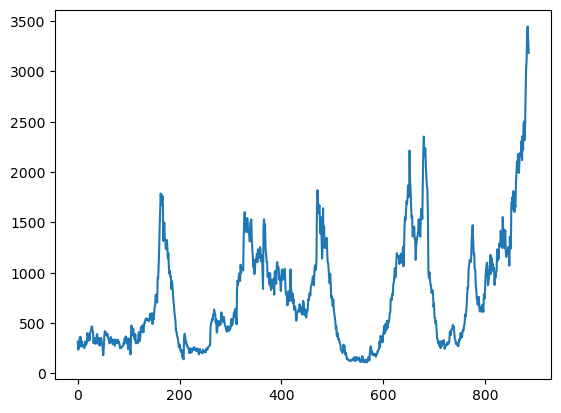

In [9]:
plt.plot(df_dengue.Casos)

In [10]:
peaks_dengue = find_peak_indexes(df_dengue.Casos)
peaks_dengue

array([ 92, 102, 196, 310, 383, 484, 600, 645, 673, 699])

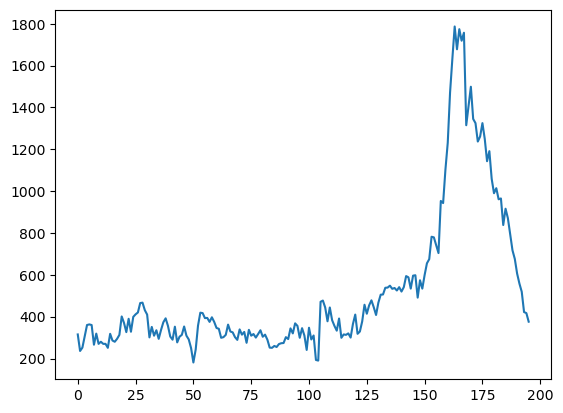

In [11]:
plt.plot(df_dengue[0:196].Casos)

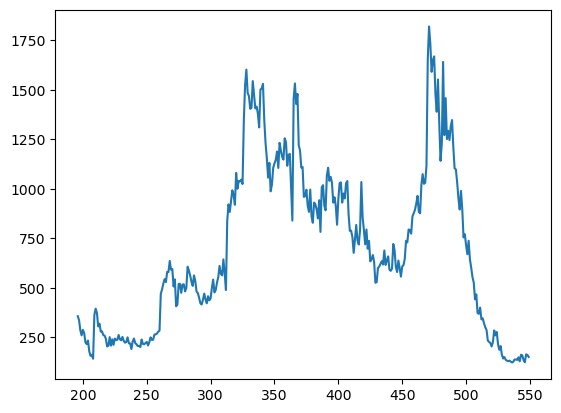

In [12]:
plt.plot(df_dengue[196:550].Casos)

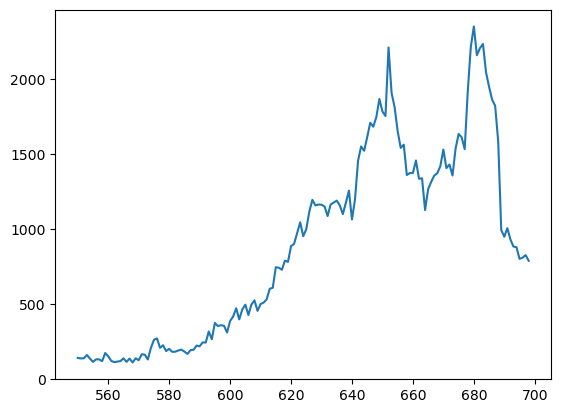

In [13]:
plt.plot(df_dengue[550:699].Casos)

In [14]:
df_dengue1 = df_dengue[0:196].copy()
df_dengue2 = df_dengue[196:550].copy()
df_dengue3 = df_dengue[550:699].copy()
df_dengue4 = df_dengue[699:].copy()

In [15]:
df_dengue1.to_csv('silver/dengue_split1.csv', index = False)
df_dengue2.to_csv('silver/dengue_split2.csv', index = False)
df_dengue3.to_csv('silver/dengue_split3.csv', index = False)
df_dengue4.to_csv('silver/dengue_split4.csv', index = False)
df_dengue.to_csv('silver/dengue_no_split.csv', index = False)
df_zika.to_csv('silver/zika.csv')
df_chic.to_csv('silver/chicunguya.csv')
df_var.to_csv('silver/varicela.csv', index = False)